In [14]:
from utils.arffloader import Loader
import numpy as np

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle
Data = Loader("/Users/louitech_zero/VoidGaze/data/TotalDataSet.npy")

data = shuffle(Data, random_state=1)
T = 150000
testf = data[T:,2:-1]
testt = data[T:,-1]

feature = data[:T,2:-1]
target = data[:T,-1]



'''
fullpc = np.concatenate((pc,target.reshape(-1,1)),axis=1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

unasign = fullpc[fullpc[:,-1]==0]
fixation = fullpc[fullpc[:,-1]==1]
saccadic = fullpc[fullpc[:,-1]==2]
noise = fullpc[fullpc[:,-1]==4]
ax.scatter(unasign[:,0],unasign[:,1],color = 'hotpink')
ax.scatter(fixation[:,0],fixation[:,1],color = 'red')
ax.scatter(saccadic[:,0],saccadic[:,1],color = 'blue')
ax.scatter(noise[:,0],noise[:,1],color = 'black')
plt.show()
'''

clf = LogisticRegression(random_state=0,penalty='l1',solver ='liblinear').fit(feature, target)
pred = clf.predict(testf)

print("without PCA : ",clf.score(testf, testt))
print("precision   : ",metrics.precision_score(pred,testt,average=None))
print("  recall    : ",metrics.recall_score(pred,testt,average=None))
print(np.transpose(metrics.confusion_matrix(pred,testt)))

clf.coef_

without PCA :  0.7903016671077004
precision   :  [0.99603075 0.01631907]
  recall    :  [0.79207288 0.52217742]
[[59472   237]
 [15612   259]]


array([[ 0.11627566,  0.09428475,  0.03412889,  1.75725365, -4.11779634,
         0.80966288]])

In [2]:
for i in range(len(testf[0]-1)):
    
    pca = PCA(n_components=i+1)

    standfeat = StandardScaler().fit_transform(feature)
    pc = pca.fit_transform(standfeat)


    standfeatTest = StandardScaler().fit_transform(testf)
    pctest = pca.transform(standfeatTest)

    clfpca = LogisticRegression(random_state=0,penalty='l1',solver ='liblinear').fit(pc, target)
    predpca = clfpca.predict(pctest)
    print(" ")
    print("No.of PC: ", i+1," -----------------------------")
    print(" ")
    print("with PCA    : ",clfpca.score(pctest, testt))
    print("precision   : ",metrics.precision_score(predpca,testt,average=None))
    print("  recall    : ",metrics.recall_score(predpca,testt,average=None))
    print(np.transpose(metrics.confusion_matrix(predpca,testt)))
    print(" ")


print(" ")
print('No_of_fixtion : ', len(testt[testt==0]))
print('No_of_saccade : ', len(testt[testt==1]))

#print('No_of_sp: ', len(testt[testt==2]))

 
No.of PC:  1  -----------------------------
 
with PCA    :  0.7896268854194232
precision   :  [0.99777253 0.00655283]
  recall    :  [0.79073039 0.43881857]
[[59576   133]
 [15767   104]]
 
 
No.of PC:  2  -----------------------------
 
with PCA    :  0.7896401164329188
precision   :  [0.99775578 0.00667885]
  recall    :  [0.79074861 0.44166667]
[[59575   134]
 [15765   106]]
 
 
No.of PC:  3  -----------------------------
 
with PCA    :  0.7896533474464144
precision   :  [0.99770554 0.00693088]
  recall    :  [0.79078226 0.44534413]
[[59572   137]
 [15761   110]]
 
 
No.of PC:  4  -----------------------------
 
with PCA    :  0.7897459645408839
precision   :  [0.99445645 0.01959549]
  recall    :  [0.79236169 0.48442368]
[[59378   331]
 [15560   311]]
 
 
No_of_fixtion :  59709
No_of_saccade :  15871


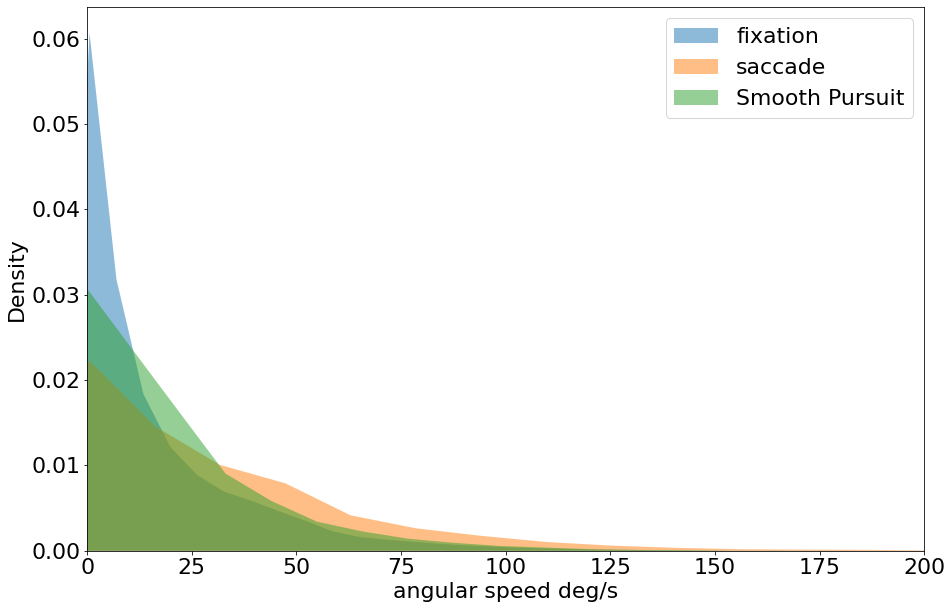

In [10]:
import seaborn as sns
from scipy.stats import norm
plt.rcParams.update({'font.size': 22})
data = Loader("/Users/louitech_zero/VoidGaze/data/TotalDataSet2.npy")
fixation = data[data[:,-1]==0]
saccade = data[data[:,-1]==1]
SP = data[data[:,-1]==2]
fig = plt.figure(figsize=(15,10))
#sns.distplot(abs(fixation[:,-2])*180/pi,bins = 6000,label = 'fixation',kde=False)

#sns.distplot(abs(saccade[:,-2])*180/pi,bins = 6000,label = 'saccade',kde=False)
#sns.distplot(abs(noise[:,-2])*180/pi,bins = 2000,label = 'noise',kde=False)
'''
Fcounts, Fbin_edges = np.histogram(abs(fixation[:,-2])*180/np.pi, bins=1000)
Scounts, Sbin_edges = np.histogram(abs(saccade[:,-2])*180/np.pi, bins=1000)
plt.plot(Fbin_edges[:-1],Fcounts/len(abs(fixation[:,-2])*180/np.pi))
plt.plot(Sbin_edges[:-1],Scounts/len(abs(saccade[:,-2])*180/np.pi))
'''

sns.kdeplot(
   data=abs(fixation[:,-2])*180/np.pi,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
sns.kdeplot(
   data=abs(saccade[:,-2])*180/np.pi,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
sns.kdeplot(
   data=abs(SP[:,-2])*180/np.pi,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)



'''
sns.kdeplot(
   data=abs(SP[:,-2])*180/pi,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
'''

plt.legend(labels=['fixation','saccade','Smooth Pursuit'])#,'smooth pursuit'
plt.xlim(0, 200)
#plt.ylim(0, 0.001)
plt.xlabel("angular speed deg/s")
plt.show()


fig.savefig("/Users/louitech_zero/Desktop/velocity_profile.png")

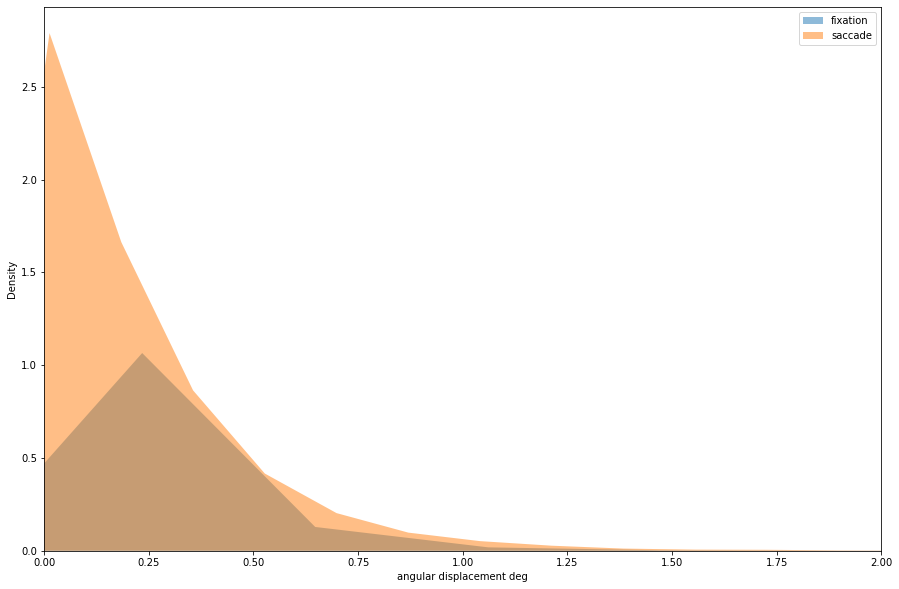

0.1590248715086833
0.22169979188742067


In [34]:
fig = plt.figure(figsize=(15,10))
#sns.distplot(abs(fixation[:,-2])*180/pi,bins = 6000,label = 'fixation',kde=False)

#sns.distplot(abs(saccade[:,-2])*180/pi,bins = 6000,label = 'saccade',kde=False)
#sns.distplot(abs(noise[:,-2])*180/pi,bins = 2000,label = 'noise',kde=False)


sns.kdeplot(
   data=abs(fixation[:,-3])*180/np.pi,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
sns.kdeplot(
   data=abs(saccade[:,-3])*180/np.pi,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
'''
sns.kdeplot(
   data=abs(SP[:,-2])*180/pi,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
'''

plt.legend(labels=['fixation','saccade'])#,'smooth pursuit'
plt.xlim(0, 2)
#plt.ylim(0, 0.001)
plt.xlabel("angular displacement deg")
plt.show()


print(sum(abs(fixation[:,-3])*180/np.pi)/len(abs(fixation[:,-3])*180/np.pi))
print(sum(abs(saccade[:,-3])*180/np.pi)/len(abs(saccade[:,-3])*180/np.pi))

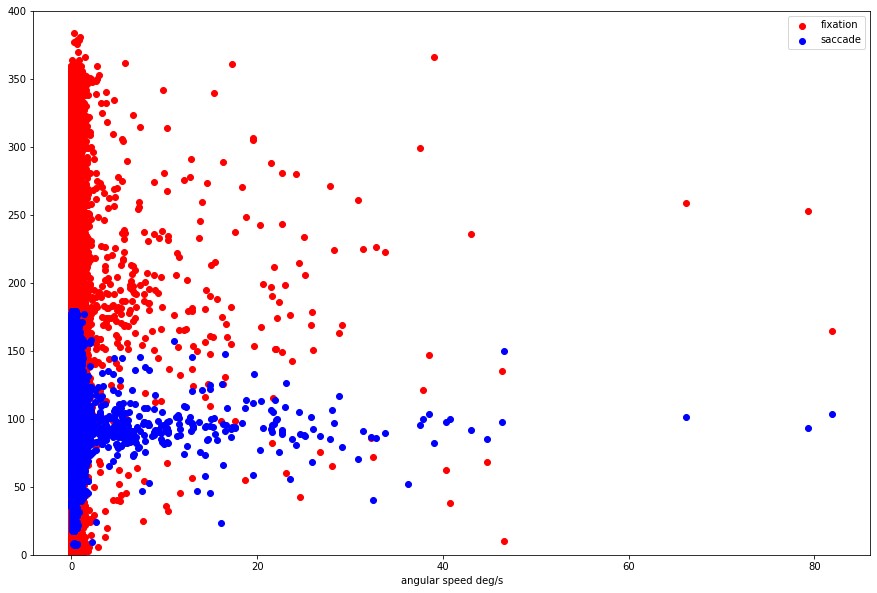

In [50]:
fig = plt.figure(figsize=(15,10))
#sns.distplot(abs(fixation[:,-2])*180/pi,bins = 6000,label = 'fixation',kde=False)

#sns.distplot(abs(saccade[:,-2])*180/pi,bins = 6000,label = 'saccade',kde=False)
#sns.distplot(abs(noise[:,-2])*180/pi,bins = 2000,label = 'noise',kde=False)


plt.scatter(data[:,-3]*180/np.pi,(data[:,0]-data[:,-5])*180/np.pi,color='red')
plt.scatter(data[:,-3]*180/np.pi,(data[:,1]-data[:,-4])*180/np.pi,color='blue')
#plt.scatter(abs(data[:,1])*180/np.pi,abs(data[:,-3])*180/np.pi,color = 'blue')
plt.legend(labels=['fixation','saccade'])#,'smooth pursuit'
#plt.xlim(0, 2)
plt.ylim(0, 400)
plt.ylabel("angular displacement between gaze and ")
plt.xlabel("angular speed deg/s")
plt.show()

In [222]:
d1 = Loader("/Users/louitech_zero/VoidGaze/data/TrainSet.npy")
d2 = Loader("/Users/louitech_zero/VoidGaze/data/TestSet.npy")
da = np.append(d1,d2,axis = 0)
print(da.shape)

(225580, 9)


In [223]:
np.save("/Users/louitech_zero/VoidGaze/data/TotalDataSet.npy",da)

In [37]:
from utils.arffloader import *
from numpy import pi
def shift(target):
    data, meta =loadArff("/Users/louitech_zero/Desktop/360_em_dataset/ground_truth/train/004_07_football_hFc9HUYRbKc.arff")
    if target == -1:
        dataArray = data
    else:
        dataArray = data[data[:,-1] == target]
    CartGaze = np.zeros((len(dataArray),3,1))
    CartHead = np.zeros((len(dataArray),3,1))
    headV = np.zeros((len(dataArray),1))
    gazeshift = np.zeros((len(dataArray),1))
    for i in range(len(dataArray)):
        (CartHead[i],CartGaze[i],GazeVec_FOV,sphereHead,sphereGaze) = PosTransform(dataArray[i],meta)

    headl = np.zeros((3,1))
    for i in range(len(CartHead)-1):
        i += 1
        headv = AngularDisp(CartHead[i],headl)/(dataArray[i,0]-dataArray[i-1,0])
        headV[i] = headv * 1000000 *180/pi
        headl = CartHead[i]
        gazeshift[i] =AngularDisp(CartGaze[i],CartHead[i])*180/pi
    return headV, gazeshift

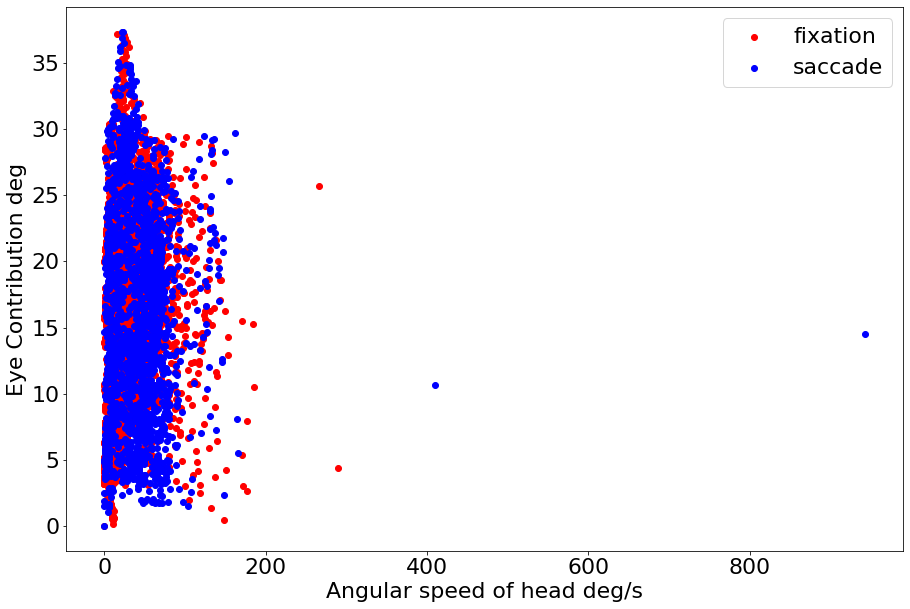

In [34]:
fig = plt.figure(figsize=(15,10))
#sns.distplot(abs(fixation[:,-2])*180/pi,bins = 6000,label = 'fixation',kde=False)

#sns.distplot(abs(saccade[:,-2])*180/pi,bins = 6000,label = 'saccade',kde=False)
#sns.distplot(abs(noise[:,-2])*180/pi,bins = 2000,label = 'noise',kde=False)
headVF, gazeshiftF = shift(0)
headVS, gazeshiftS = shift(1)

plt.scatter(headVF,gazeshiftF,color='red')
plt.scatter(headVS,gazeshiftS,color='blue')
#plt.scatter(abs(data[:,1])*180/np.pi,abs(data[:,-3])*180/np.pi,color = 'blue')
plt.legend(labels=['fixation','saccade'])#,'smooth pursuit'
#plt.xlim(0, 2)

plt.ylabel("Eye Contribution deg")
plt.xlabel("Angular speed of head deg/s")
plt.show()


fig.savefig("/Users/louitech_zero/Desktop/DvsV.png")

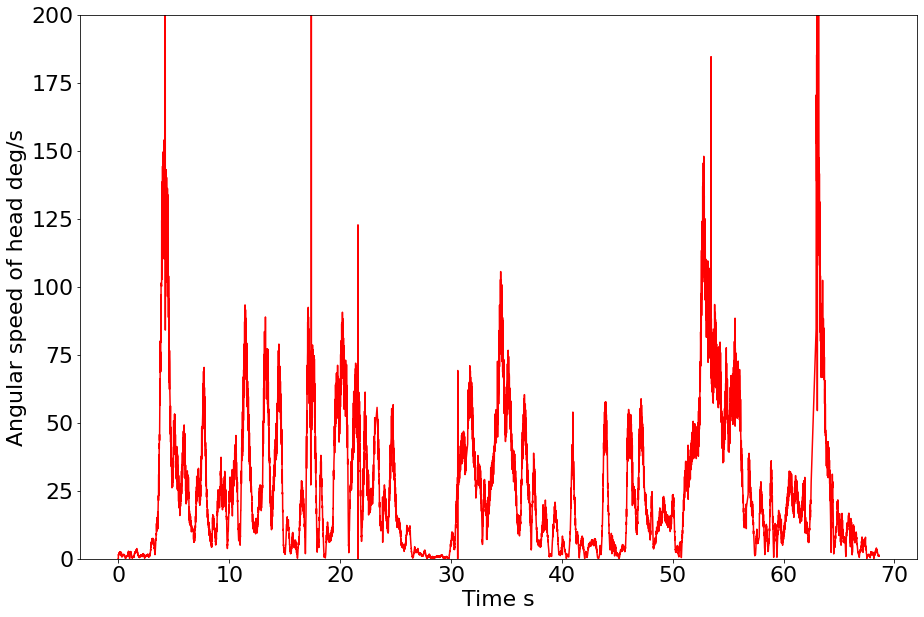

In [46]:
fig = plt.figure(figsize=(15,10))
#sns.distplot(abs(fixation[:,-2])*180/pi,bins = 6000,label = 'fixation',kde=False)

#sns.distplot(abs(saccade[:,-2])*180/pi,bins = 6000,label = 'saccade',kde=False)
#sns.distplot(abs(noise[:,-2])*180/pi,bins = 2000,label = 'noise',kde=False)
headV, _ = shift(-1)
data, meta =loadArff("/Users/louitech_zero/Desktop/360_em_dataset/ground_truth/train/004_07_football_hFc9HUYRbKc.arff")

plt.plot(data[:,0]/1000000,headV,color='red')

#plt.legend(labels=['fixation','saccade'])#,'smooth pursuit'
plt.ylim(0, 200)

plt.ylabel("Angular speed of head deg/s")
plt.xlabel("Time s")
plt.show()

"\npylab.figure()  \nvalid_iter = range(1,n_iter) # Pminus not valid at step 0  \npylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')  \npylab.xlabel('Iteration')  \npylab.ylabel('$(Voltage)^2$')  \npylab.setp(pylab.gca(),'ylim',[0,.01])  \npylab.show()  \n"

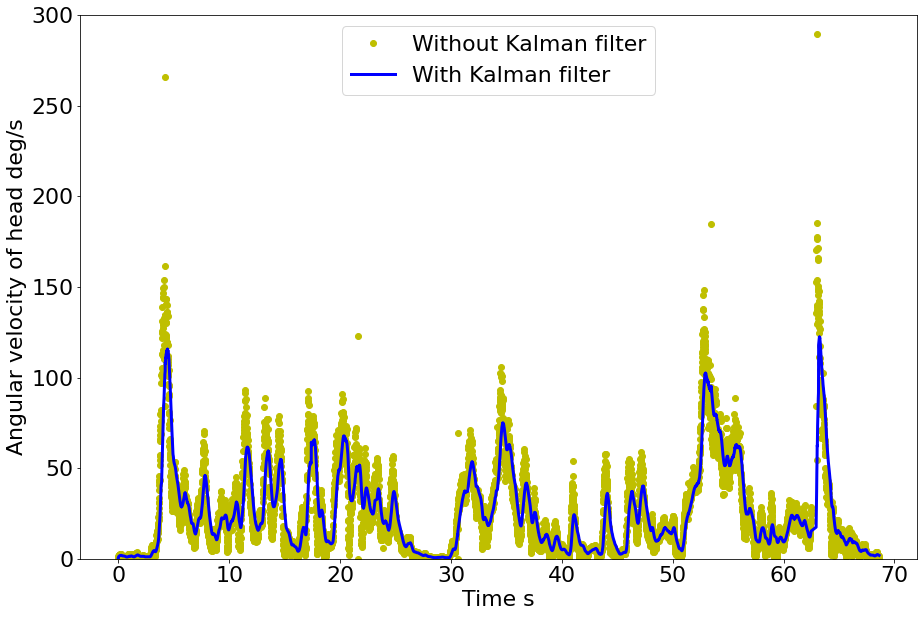

In [85]:

import numpy  
import pylab  
     
   #这里是假设A=1，H=1的情况  
     
   # 参数初始化  

n_iter = len(headV)  
sz = (n_iter,) # size of array  
#x = -0.37727 # 真实值  
#z = numpy.random.normal(x,0.1,size=sz) # 观测值 ,观测时存在噪声
z = headV
Q = 1e-5 # process variance  
     
# 分配数组空间  
xhat=numpy.zeros(sz)      # x 滤波估计值  
P=numpy.zeros(sz)         # 滤波估计协方差矩阵  
xhatminus=numpy.zeros(sz) #  x 估计值  
Pminus=numpy.zeros(sz)    # 估计协方差矩阵  
K=numpy.zeros(sz)         # 卡尔曼增益  
     
R = 0.1**2 # estimate of measurement variance, change to see effect  
     
# intial guesses  
xhat[0] = 0.0  
P[0] = 1.0  
     
for k in range(1,n_iter):  
       # 预测  
    xhatminus[k] = xhat[k-1]  #X(k|k-1) = AX(k-1|k-1) + BU(k) + W(k),A=1,BU(k) = 0  
    Pminus[k] = P[k-1]+Q      #P(k|k-1) = AP(k-1|k-1)A' + Q(k) ,A=1  
     
    # 更新  
    K[k] = Pminus[k]/( Pminus[k]+R ) #Kg(k)=P(k|k-1)H'/[HP(k|k-1)H' + R],H=1  
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k]) #X(k|k) = X(k|k-1) + Kg(k)[Z(k) - HX(k|k-1)], H=1  
    P[k] = (1-K[k])*Pminus[k] #P(k|k) = (1 - Kg(k)H)P(k|k-1), H=1  
     
figfilted = plt.figure(figsize=(15,10))  
plt.plot(data[:,0]/1000000,z,'yo',linewidth=3)     #观测值  
plt.plot(data[:,0]/1000000,xhat,color = 'blue',linewidth=3)  #滤波估计值  
#plt.axhline(x,color='g',label='truth value')    #真实值  
plt.legend(['Without Kalman filter','With Kalman filter'])  
plt.xlabel('Time s')  
plt.ylabel('Angular velocity of head deg/s')  

plt.ylim(0, 300)
figfilted.savefig("/Users/louitech_zero/Desktop/kalman.png")
'''
pylab.figure()  
valid_iter = range(1,n_iter) # Pminus not valid at step 0  
pylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')  
pylab.xlabel('Iteration')  
pylab.ylabel('$(Voltage)^2$')  
pylab.setp(pylab.gca(),'ylim',[0,.01])  
pylab.show()  
'''  